In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

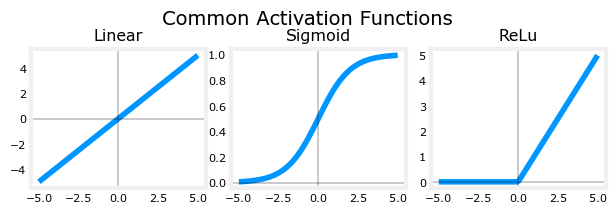

In [3]:
plt_act_trio()

In [4]:
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """
    ### BEGIN SOLUTION
    a = np.exp(z)/np.sum(np.exp(z))
    ### END SOLUTION
    return a

In [5]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# BEGIN UNIT TEST
assert test_my_softmax(my_softmax)
# END UNIT TEST

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


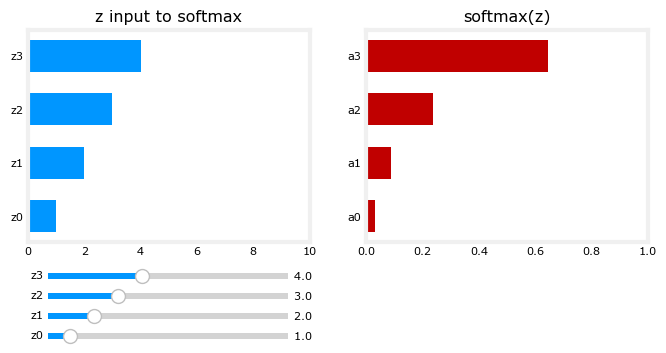

In [6]:
plt.close("all")
plt_softmax(my_softmax)

In [7]:
# load dataset
# X, y = load_data()
# Path to the dataset
file_path = "C:/Users/ymasa/Desktop/Simple-Neural-Network-for-Handwritten-Digit-Recognition/emnist-bymerge-train.csv"

# Load the CSV file
data = pd.read_csv(file_path)

# Check the column names to ensure the structure matches the expectations
print("Column names:", data.columns)

# Separate features (X) and labels (y)
y = data.iloc[:, 0].values  # Assuming the first column is 'label'
X = data.iloc[:, 1:].values  # The rest of the columns are pixel data

# Normalize pixel values (0-255) to the range (0-1)
X = X / 255.0
# Check the shapes
print(f"Shape of X: {X.shape}")  # (num_samples, 784)
print(f"Shape of y: {y.shape}")  # (num_samples,)

# Example: Inspect the first sample
print(f"First sample pixel values:\n{X[0]}")
print(f"First sample label: {y[0]}")

Column names: Index(['24', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.431', '0.432', '0.433', '0.434', '0.435', '0.436', '0.437', '0.438',
       '0.439', '0.440'],
      dtype='object', length=785)
Shape of X: (697931, 784)
Shape of y: (697931,)
First sample pixel values:
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02
 0.44 0.45 0.2  0.15 0.13 0.01 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.1
 0.9  0.96 0.87 0.85 0.8  0.31 0.04 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.04 0.36 0.79 0.87
 0.99 1.   1.   1.   1.   0.97 0.81 0.31 0.01 0.   0.   0.   

In [8]:
print ('The first element of X is: ', X[0])

The first element of X is:  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02
 0.44 0.45 0.2  0.15 0.13 0.01 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.1
 0.9  0.96 0.87 0.85 0.8  0.31 0.04 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.04 0.36 0.79 0.87
 0.99 1.   1.   1.   1.   0.97 0.81 0.31 0.01 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.3  0.55 0.87 0.99 1.
 1.   1.   0.98 0.89 0.96 1.   0.98 0.67 0.08 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.09 0.81 0.98 0.98 0.91 0.86
 0.98 1.   0.82 0.31 0.52 0.99 1.   0.85 0.15 0.   0.   0.   0.   0.

In [9]:
# print ('The first element of y is: ', y[0,0])
# print ('The last element of y is: ', y[-1,0])

In [10]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (697931, 784)
The shape of y is: (697931,)


In [11]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

# # You do not need to modify anything in this cell
# m, n = X.shape

# fig, axes = plt.subplots(8, 8, figsize=(5, 5))
# fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  # [left, bottom, right, top]

# widgvis(fig)

# for i, ax in enumerate(axes.flat):
#     # Select random indices
#     random_index = np.random.randint(m)

#     # Select rows corresponding to the random indices and reshape the image
#     X_random_reshaped = X[random_index].reshape((28, 28)).T  # Correct shape is (28, 28)

#     # Display the image
#     ax.imshow(X_random_reshaped, cmap='gray')

#     # Display the label above the image
#     ax.set_title(y[random_index])  # Fixed: Single index to access y
#     ax.set_axis_off()

# fig.suptitle("Label, image", fontsize=14)
# plt.show()


In [12]:
tf.random.set_seed(1234)  # for consistent results

model = Sequential(
    [
        ### BEGIN SOLUTION
        tf.keras.Input(shape=(784,)),  # Updated to match the new dataset
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(15, activation='relu'),
        tf.keras.layers.Dense(47, activation='linear')  # Output layer for 10 classes
        ### END SOLUTION
    ],
    name="my_model"
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)


In [13]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 47)             │           752 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,767 (81.12 KB)

 Trainable params: 20,767 (81.12 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# # BEGIN UNIT TEST
# assert test_model(model, 10, 400)
# # END UNIT TEST

In [15]:
[layer1, layer2, layer3] = model.layers

In [16]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 47), b3 shape = (47,)


In [17]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
)

history = model.fit(
    X,y,
    epochs=10
)

Epoch 1/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 23s 927us/step - loss: 1.0233
Epoch 2/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 18s 842us/step - loss: 0.7101
Epoch 3/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 18s 800us/step - loss: 0.6824
Epoch 4/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 18s 808us/step - loss: 0.6682
Epoch 5/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 18s 802us/step - loss: 0.6612
Epoch 6/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 18s 834us/step - loss: 0.6566
Epoch 7/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 18s 823us/step - loss: 0.6536
Epoch 8/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 18s 842us/step - loss: 0.6508
Epoch 9/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 19s 876us/step - loss: 0.6488
Epoch 10/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 19s 877us/step - loss: 0.6468


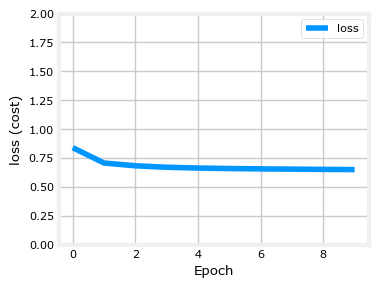

In [18]:
plot_loss_tf(history)

In [19]:
# image_of_two = X[1015]
# display_digit(image_of_two)

# prediction = model.predict(image_of_two.reshape(1,400))  # prediction

# print(f" predicting a Two: \n{prediction}")
# print(f" Largest Prediction index: {np.argmax(prediction)}")



def preprocess_image(image_path):
    """
    Preprocess the image to match the input shape of the model.
    Args:
        image_path (str): Path to the image file.
    Returns:
        np.array: Preprocessed image ready for prediction.
    """
    # Open the image and convert to grayscale
    img = Image.open(image_path).convert('L')

    # Resize to 28x28 pixels (same as MNIST)
    img = img.resize((28, 28))

    # Convert image to a NumPy array and normalize to [0, 1]
    img_array = np.array(img) / 255.0

    # Flatten the image to match the model's input shape (1, 784)
    img_array = img_array.reshape(1, 784)

    return img_array

def predict_image(image_path, model):
    """
    Predict the class of a given image using the trained model.
    Args:
        image_path (str): Path to the image file.
        model: Trained Keras model.
    Returns:
        int: Predicted class label.
    """
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Make prediction
    predictions = model.predict(img_array)

    # Get the class with the highest probability
    predicted_class = np.argmax(predictions)

    return predicted_class

# Path to your image
image_path = "C:/Users/ymasa/Desktop/Simple-Neural-Network-for-Handwritten-Digit-Recognition/Handwritten_Images/handwritten_8.png"

# Predict the class
predicted_class = predict_image(image_path, model)

# Print the prediction
print(f"The model predicts this image as: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
The model predicts this image as: 25


In [22]:
import os
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from sklearn.metrics import f1_score

# Function to load the dataset
def load_emnist_test_dataset(file_path):
    # Assuming the dataset is in CSV format with the first column as labels and the rest as features
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)
    labels = data[:, 0].astype(np.int32)
    features = data[:, 1:].astype(np.float32) / 255.0  # Normalize the data
    return features, labels

# Test function
def test_on_new_dataset(model, dataset_dir, batch_size=64):
    # Load the dataset
    test_features, test_labels = load_emnist_test_dataset(os.path.join(dataset_dir, 'emnist-bymerge-test.csv'))

    # Create a tf.data.Dataset
    test_dataset = tf.data.Dataset.from_tensor_slices((test_features, test_labels))
    test_dataset = test_dataset.batch(batch_size)

    # Evaluate the model
    preds, targets = [], []
    for batch_features, batch_labels in tqdm(test_dataset, desc="Testing"):
        # Make predictions
        logits = model(batch_features, training=False)  # Set training=False for inference
        batch_preds = tf.argmax(logits, axis=1).numpy()
        
        # Append predictions and targets
        preds.extend(batch_preds)
        targets.extend(batch_labels.numpy())

    # Calculate F1 Score
    f1 = f1_score(targets, preds, average='weighted')
    print(f"New Dataset F1 Score: {f1:.4f}")

# Example usage:
# Assuming `model` is your trained TensorFlow model and `dataset_dir` is the directory containing the dataset
test_on_new_dataset(model, "C:/Users/ymasa/Desktop/Simple-Neural-Network-for-Handwritten-Digit-Recognition")


Testing: 100%|██████████| 1818/1818 [00:04<00:00, 425.15it/s]


New Dataset F1 Score: 0.7841
